In [1]:
import pandas as pd

In [26]:
import requests

url = "https://api.elections.kalshi.com/trade-api/v2/events/KXNBAGAME-25MAY12BOSNYK"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

{"event":{"event_ticker":"KXNBAGAME-25MAY12BOSNYK","series_ticker":"KXNBAGAME","sub_title":"BOS at NYK (May 12)","title":"Boston vs New York: Game 4 Winner?","collateral_return_type":"MECNET","mutually_exclusive":true,"category":"Sports"},"markets":[{"ticker":"KXNBAGAME-25MAY12BOSNYK-BOS","event_ticker":"KXNBAGAME-25MAY12BOSNYK","market_type":"binary","title":"","subtitle":"","yes_sub_title":"Boston","no_sub_title":"Boston","open_time":"2025-05-10T22:10:00Z","close_time":"2027-05-12T23:30:00Z","expected_expiration_time":"2025-05-13T02:30:00Z","expiration_time":"2027-05-12T23:30:00Z","latest_expiration_time":"2027-05-12T23:30:00Z","settlement_timer_seconds":500,"status":"active","response_price_units":"usd_cent","notional_value":100,"tick_size":1,"yes_bid":76,"yes_ask":77,"no_bid":23,"no_ask":24,"last_price":76,"previous_yes_bid":0,"previous_yes_ask":0,"previous_price":0,"volume":200978,"volume_24h":192516,"liquidity":173367591,"open_interest":155216,"result":"","can_close_early":true,"

In [71]:
import requests
import time

url = "https://api.elections.kalshi.com/trade-api/v2/series/KXNBAGAME/markets/KXNBAGAME-25MAY12BOSNYK-NYK/candlesticks"

headers = {"accept": "application/json"}

params = {
    "start_ts": int(time.time() - 60 * 60 * 6),
    "end_ts": int(time.time()),
    "period_interval": 1,
}

response = requests.get(url, headers=headers, params=params)

In [72]:
df = pd.DataFrame(response.json()['candlesticks'])

from datetime import datetime


df["t"] = df["end_period_ts"].apply(lambda x: datetime.fromtimestamp(x))
df["p"] = df["price"].apply(lambda x: x["close"])

df

,end_period_ts,yes_bid,yes_ask,price,volume,open_interest,t,p
0,1747077180,"{'open': 31, 'low': 31, 'high': 31, 'close': 31}","{'open': 32, 'low': 32, 'high': 32, 'close': 32}","{'open': 32, 'low': 32, 'high': 32, 'close': 3...",56,67239,2025-05-12 15:13:00,32.0
1,1747077300,"{'open': 31, 'low': 31, 'high': 31, 'close': 31}","{'open': 32, 'low': 32, 'high': 32, 'close': 32}","{'open': 32, 'low': 32, 'high': 32, 'close': 3...",28,67267,2025-05-12 15:15:00,32.0
2,1747077420,"{'open': 31, 'low': 31, 'high': 31, 'close': 31}","{'open': 32, 'low': 32, 'high': 32, 'close': 32}","{'open': 32, 'low': 32, 'high': 32, 'close': 3...",64,67331,2025-05-12 15:17:00,32.0
3,1747077480,"{'open': 31, 'low': 31, 'high': 31, 'close': 31}","{'open': 32, 'low': 32, 'high': 32, 'close': 32}","{'open': 32, 'low': 32, 'high': 32, 'close': 3...",59,67390,2025-05-12 15:18:00,32.0
4,1747077600,"{'open': 31, 'low': 31, 'high': 31, 'close': 31}","{'open': 32, 'low': 32, 'high': 32, 'close': 32}","{'open': 32, 'low': 32, 'high': 32, 'close': 3...",193,67583,2025-05-12 15:20:00,32.0
...,...,...,...,...,...,...,...,...
317,1747098480,"{'open': 12, 'low': 11, 'high': 12, 'close': 12}","{'open': 13, 'low': 13, 'high': 13, 'close': 13}","{'open': 13, 'low': 12, 'high': 13, 'close': 1...",2257,426331,2025-05-12 21:08:00,12.0
318,1747098540,"{'open': 12, 'low': 12, 'high': 12, 'close': 12}","{'open': 13, 'low': 13, 'high': 13, 'close': 13}","{'open': 13, 'low': 12, 'high': 13, 'close': 1...",1929,428222,2025-05-12 21:09:00,13.0
319,1747098600,"{'open': 12, 'low': 12, 'high': 14, 'close': 13}","{'open': 13, 'low': 13, 'high': 15, 'close': 14}","{'open': 13, 'low': 13, 'high': 14, 'close': 1...",8751,428409,2025-05-12 21:10:00,14.0
320,1747098660,"{'open': 13, 'low': 13, 'high': 19, 'close': 19}","{'open': 14, 'low': 14, 'high': 21, 'close': 20}","{'open': 14, 'low': 14, 'high': 19, 'close': 1...",13102,435781,2025-05-12 21:11:00,19.0


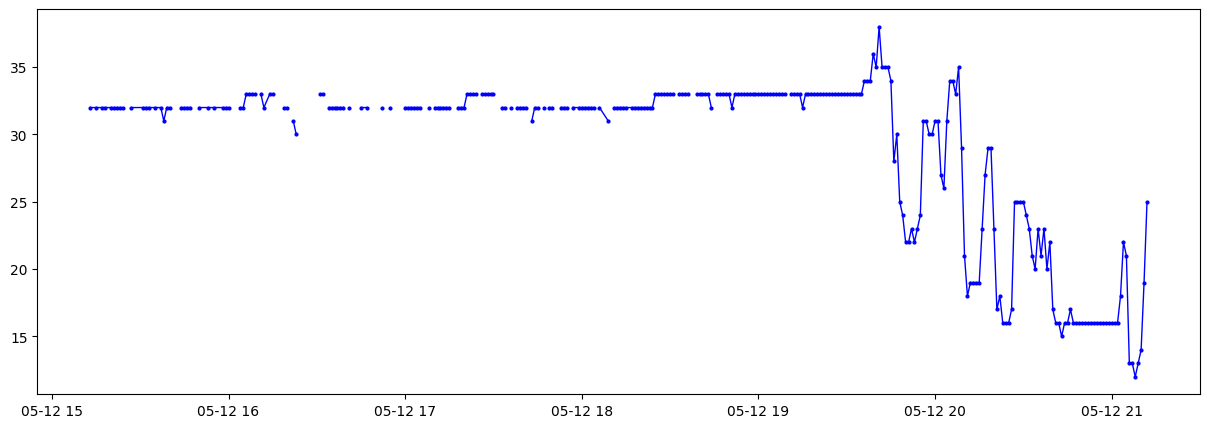

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(
    df["t"],
    df["p"],
    label="KXNBAGAME-25MAY12BOSNYK",
    color="blue",
    marker="o",
    markersize=2,
    linewidth=1,
)

In [45]:
import requests

url = "https://api.elections.kalshi.com/trade-api/v2/markets"

headers = {"accept": "application/json"}

params = {
    "event_ticker": "KXNBAGAME-25MAY12BOSNYK",
}

response = requests.get(url, headers=headers, params=params)

print(response.text)

{"markets":[{"ticker":"KXNBAGAME-25MAY12BOSNYK-NYK","event_ticker":"KXNBAGAME-25MAY12BOSNYK","market_type":"binary","title":"Boston vs New York Winner?","subtitle":"","yes_sub_title":"New York","no_sub_title":"New York","open_time":"2025-05-10T22:10:00Z","close_time":"2027-05-12T23:30:00Z","expected_expiration_time":"2025-05-13T02:30:00Z","expiration_time":"2027-05-12T23:30:00Z","latest_expiration_time":"2027-05-12T23:30:00Z","settlement_timer_seconds":500,"status":"active","response_price_units":"usd_cent","notional_value":100,"tick_size":1,"yes_bid":19,"yes_ask":20,"no_bid":80,"no_ask":81,"last_price":20,"previous_yes_bid":30,"previous_yes_ask":31,"previous_price":31,"volume":516631,"volume_24h":478717,"liquidity":164936532,"open_interest":337116,"result":"","can_close_early":true,"expiration_value":"","category":"","risk_limit_cents":0,"strike_type":"structured","custom_strike":{"basketball_team":"67468ecc-b868-43a4-b9dc-751a52894bb0"},"rules_primary":"If New York wins the Boston vs

In [34]:
time.time() - 60

1747096494.878346

In [22]:
df[
    df["title"].str.contains("NBA", case=False)
]

,ticker,frequency,title,category,tags,settlement_sources,contract_url
41,KXWNBA,annual,WNBA Championship,Sports,[Basketball],"[{'url': 'https://apnews.com/', 'name': 'AP'},...",https://kalshi-public-docs.s3.us-east-1.amazon...
53,KXNBAALLSTAR,annual,NBA ALl-Star game,Sports,[Basketball],"[{'url': 'https://apnews.com/', 'name': 'AP'},...",https://kalshi-public-docs.s3.us-east-1.amazon...
63,KXNBAWEST,annual,NBA Western Conference Championship,Sports,[Basketball],"[{'url': 'https://apnews.com/', 'name': 'AP'},...",https://kalshi-public-docs.s3.us-east-1.amazon...
145,KXNBAEAST,annual,NBA Eastern Conference Championship,Sports,[Basketball],"[{'url': 'https://apnews.com/', 'name': 'AP'},...",https://kalshi-public-docs.s3.us-east-1.amazon...
151,KXNBA,annual,NBA Championship,Sports,[Basketball],"[{'url': 'https://apnews.com/', 'name': 'AP'},...",https://kalshi-public-docs.s3.us-east-1.amazon...
172,KXNBAGAMES,daily,NBA games,Sports,None,"[{'url': 'https://www.espn.com/', 'name': 'ESP...",https://kalshi-public-docs.s3.us-east-1.amazon...
